# Coffee Choice prediction

## Preprocessing the data

In [1]:
# Import the libraries
import pandas as pd 
import numpy as np
import math
import matplotlib.pyplot as plt


In [2]:
# Loading the data
data= pd.read_csv("GACTT_RESULTS_ANONYMIZED_v2.csv")
print(data.columns)
print(data.ndim)
print(data.head(4))

Index(['Submission ID', 'What is your age?',
       'How many cups of coffee do you typically drink per day?',
       'Where do you typically drink coffee?',
       'Where do you typically drink coffee? (At home)',
       'Where do you typically drink coffee? (At the office)',
       'Where do you typically drink coffee? (On the go)',
       'Where do you typically drink coffee? (At a cafe)',
       'Where do you typically drink coffee? (None of these)',
       'How do you brew coffee at home?',
       ...
       'Approximately how much have you spent on coffee equipment in the past 5 years?',
       'Do you feel like you’re getting good value for your money with regards to your coffee equipment?',
       'Gender', 'Gender (please specify)', 'Education Level',
       'Ethnicity/Race', 'Ethnicity/Race (please specify)',
       'Employment Status', 'Number of Children', 'Political Affiliation'],
      dtype='object', length=113)
2
  Submission ID What is your age?  \
0        gMR29l   18

**Filtering the data based on the coloumn "Lastly, what was your favorite overall coffee?"**

In [3]:
names=data.columns.to_list()
print(names)
print(data.dtypes)


['Submission ID', 'What is your age?', 'How many cups of coffee do you typically drink per day?', 'Where do you typically drink coffee?', 'Where do you typically drink coffee? (At home)', 'Where do you typically drink coffee? (At the office)', 'Where do you typically drink coffee? (On the go)', 'Where do you typically drink coffee? (At a cafe)', 'Where do you typically drink coffee? (None of these)', 'How do you brew coffee at home?', 'How do you brew coffee at home? (Pour over)', 'How do you brew coffee at home? (French press)', 'How do you brew coffee at home? (Espresso)', 'How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee))', 'How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso))', 'How do you brew coffee at home? (Instant coffee)', 'How do you brew coffee at home? (Bean-to-cup machine)', 'How do you brew coffee at home? (Cold brew)', 'How do you brew coffee at home? (Coffee extract (e.g. Cometeer))', 'How do you brew coffee at home? (O

In [4]:

missing_value=data.isnull().sum()['Lastly, what was your favorite overall coffee?']
print("Missing Value:",missing_value)
data=data.dropna(subset=["Lastly, what was your favorite overall coffee?"])
print("Data shape:",data.shape)

Missing Value: 272
Data shape: (3770, 113)


In [5]:
flavouring_missing_count=data.isnull().sum()['What kind of flavorings do you add?']
print(flavouring_missing_count)
data=data.loc[:,~data.columns.str.contains('What kind of flavorings do you add?', case=True)] 
print("Data Shape:",data.shape)

3770
Data Shape: (3770, 106)


In [6]:
# Calculate the percentage of missing values for each column
missing_values = data.isnull().sum() / len(data)
missing_values=missing_values[missing_values > 0.6]
# Create a DataFrame with column names and missing values percentage
missing_values_table = pd.DataFrame({'Column Name': missing_values.index, 'Percentage of Missing Values': missing_values.values})

# Sort the DataFrame by missing values percentage in descending order
missing_values_table = missing_values_table.sort_values(by='Percentage of Missing Values', ascending=False)
Missing_value=pd.DataFrame(missing_values_table)
# Print the DataFrame
print(Missing_value)
Missing_value.to_csv("missing_percentage.csv")

                                          Column Name  \
20                   What other flavoring do you use?   
22                            Gender (please specify)   
8                  Where else do you purchase coffee?   
10               What else do you add to your coffee?   
23                    Ethnicity/Race (please specify)   
9   Please specify what your favorite coffee drink is   
21                   Other reason for drinking coffee   
11        What kind of sugar or sweetener do you add?   
12  What kind of sugar or sweetener do you add? (G...   
16  What kind of sugar or sweetener do you add? (S...   
19  What kind of sugar or sweetener do you add? (R...   
18  What kind of sugar or sweetener do you add? (B...   
17  What kind of sugar or sweetener do you add? (A...   
13  What kind of sugar or sweetener do you add? (A...   
14  What kind of sugar or sweetener do you add? (H...   
15  What kind of sugar or sweetener do you add? (M...   
0                How else do yo

In [7]:
# Calculate the percentage of missing values for each column
missing_values = data.isnull().sum() / len(data)

# Drop columns with missing values greater than 60%
data = data.dropna(thresh=0.4)

print(data)

     Submission ID What is your age?  \
15          Zd694B     <18 years old   
16          QAeYZY     >65 years old   
17          QA5JYA   25-34 years old   
19          jyDqva   18-24 years old   
34          ylqbBg   45-54 years old   
...            ...               ...   
4037        PA44VP     >65 years old   
4038        vNgpPD     >65 years old   
4039        g5ggRM   18-24 years old   
4040        rlgbDN   25-34 years old   
4041        0EGYe9   25-34 years old   

     How many cups of coffee do you typically drink per day?  \
15                                                    3        
16                                                    3        
17                                                    1        
19                                                    2        
34                                                    2        
...                                                 ...        
4037                                                  2        
4038   

In [8]:
# Create a list of columns to drop
columns_to_drop = ['Coffee D - Notes', 'Coffee A - Notes', 'Coffee B - Notes', 'Coffee C - Notes',"Where do you typically drink coffee?","How do you brew coffee at home?","On the go, where do you typically purchase coffee?","Do you usually add anything to your coffee?","What kind of dairy do you add?","What kind of sugar or sweetener do you add?","Why do you drink coffee?","How else do you brew coffee at home?","Please specify what your favorite coffee drink is","What else do you add to your coffee?","What other flavoring do you use?","Gender (please specify)","Where else do you purchase coffee?","Other reason for drinking coffee","Ethnicity/Race (please specify)","Number of Children",
                   "Between Coffee A, Coffee B, and Coffee C which did you prefer?","Between Coffee A and Coffee D, which did you prefer?"]

# Drop the specified columns
data = data.drop(columns=columns_to_drop)
print("Data Shape:",data.shape)

Data Shape: (3770, 84)


## Feature Engineering

In [9]:
# Columns with binary responses ( 'True' and 'False' are the values)
binary_columns = ['Where do you typically drink coffee? (At home)',
       'Where do you typically drink coffee? (At the office)',
       'Where do you typically drink coffee? (On the go)',
       'Where do you typically drink coffee? (At a cafe)','Do you like the taste of coffee?', 'Do you know where your coffee comes from?', 'Do you feel like you’re getting good value for your money when you buy coffee at a cafe?', 'Do you feel like you’re getting good value for your money with regards to your coffee equipment?',
       'Where do you typically drink coffee? (None of these)','How do you brew coffee at home? (Pour over)', 'How do you brew coffee at home? (French press)', 'How do you brew coffee at home? (Espresso)', 'How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee))', 'How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso))', 'How do you brew coffee at home? (Instant coffee)', 'How do you brew coffee at home? (Bean-to-cup machine)', 'How do you brew coffee at home? (Cold brew)', 'How do you brew coffee at home? (Coffee extract (e.g. Cometeer))', 'How do you brew coffee at home? (Other)','On the go, where do you typically purchase coffee? (National chain (e.g. Starbucks, Dunkin))', 'On the go, where do you typically purchase coffee? (Local cafe)', 'On the go, where do you typically purchase coffee? (Drive-thru)', 'On the go, where do you typically purchase coffee? (Specialty coffee shop)', 'On the go, where do you typically purchase coffee? (Deli or supermarket)', 'On the go, where do you typically purchase coffee? (Other)','Do you usually add anything to your coffee? (No - just black)', 'Do you usually add anything to your coffee? (Milk, dairy alternative, or coffee creamer)', 'Do you usually add anything to your coffee? (Sugar or sweetener)', 'Do you usually add anything to your coffee? (Flavor syrup)', 'Do you usually add anything to your coffee? (Other)','What kind of dairy do you add? (Whole milk)', 'What kind of dairy do you add? (Skim milk)', 'What kind of dairy do you add? (Half and half)', 'What kind of dairy do you add? (Coffee creamer)', 'What kind of dairy do you add? (Flavored coffee creamer)', 'What kind of dairy do you add? (Oat milk)', 'What kind of dairy do you add? (Almond milk)', 'What kind of dairy do you add? (Soy milk)', 'What kind of dairy do you add? (Other)','What kind of sugar or sweetener do you add? (Granulated Sugar)', 'What kind of sugar or sweetener do you add? (Artificial Sweeteners (e.g., Splenda))', 'What kind of sugar or sweetener do you add? (Honey)', 'What kind of sugar or sweetener do you add? (Maple Syrup)', 'What kind of sugar or sweetener do you add? (Stevia)', 'What kind of sugar or sweetener do you add? (Agave Nectar)', 'What kind of sugar or sweetener do you add? (Brown Sugar)', 'What kind of sugar or sweetener do you add? (Raw Sugar (Turbinado))','Why do you drink coffee? (It tastes good)', 'Why do you drink coffee? (I need the caffeine)', 'Why do you drink coffee? (I need the ritual)', 'Why do you drink coffee? (It makes me go to the bathroom)', 'Why do you drink coffee? (Other)'
       ]

# Replace 'True' and 'False' with 1 and 0, respectively
data[binary_columns] = data[binary_columns].astype(bool)



print(data.head(2))
print(data.dtypes)

   Submission ID What is your age?  \
15        Zd694B     <18 years old   
16        QAeYZY     >65 years old   

   How many cups of coffee do you typically drink per day?  \
15                                                  3        
16                                                  3        

    Where do you typically drink coffee? (At home)  \
15                                            True   
16                                           False   

    Where do you typically drink coffee? (At the office)  \
15                                               True      
16                                               True      

    Where do you typically drink coffee? (On the go)  \
15                                             False   
16                                             False   

    Where do you typically drink coffee? (At a cafe)  \
15                                              True   
16                                              True   

    Where do you

In [10]:
category_coloumns=["What is your age?","What is your favorite coffee drink?","Before today's tasting, which of the following best described what kind of coffee you like?","How much caffeine do you like in your coffee?","What is the most you've ever paid for a cup of coffee?","Do you work from home or in person?","Lastly, how would you rate your own coffee expertise?","Lastly, what was your favorite overall coffee?","In total, much money do you typically spend on coffee in a month?","What is the most you'd ever be willing to pay for a cup of coffee?","Approximately how much have you spent on coffee equipment in the past 5 years?","Gender","Education Level","Ethnicity/Race","Employment Status","Political Affiliation","How many cups of coffee do you typically drink per day?","How strong do you like your coffee?","What roast level of coffee do you prefer?",
                   "Coffee A - Bitterness","Coffee A - Acidity","Coffee A - Personal Preference","Coffee B - Bitterness","Coffee B - Acidity","Coffee B - Personal Preference","Coffee C - Bitterness","Coffee C - Acidity","Coffee C - Personal Preference","Coffee D - Bitterness","Coffee D - Acidity","Coffee D - Personal Preference"]
data[category_coloumns]=data[category_coloumns].astype("category")
data["What is the most you've ever paid for a cup of coffee?"]=data["What is the most you've ever paid for a cup of coffee?"].astype("category")
# Print the modified DataFrame
print(data.dtypes)

Submission ID                                                object
What is your age?                                          category
How many cups of coffee do you typically drink per day?    category
Where do you typically drink coffee? (At home)                 bool
Where do you typically drink coffee? (At the office)           bool
                                                             ...   
Gender                                                     category
Education Level                                            category
Ethnicity/Race                                             category
Employment Status                                          category
Political Affiliation                                      category
Length: 84, dtype: object


## Filtered Dataset

In [11]:
# Filtered dataset
data.to_csv("filtered.csv",index=False)

In [12]:
basic_stats_filtered=data.describe()
basic_filtered=pd.DataFrame(basic_stats_filtered)
basic_filtered.to_csv("filtered_stats.csv",index=True)

### Missing value imputation

In [13]:
missing_values = data.isnull().sum() / len(data)
#missing_values=missing_values[missing_values > 0.6]
# Create a DataFrame with column names and missing values percentage
missing_values_table = pd.DataFrame({'Column Name': missing_values.index, 'Percentage of Missing Values': missing_values.values})

# Sort the DataFrame by missing values percentage in descending order
missing_values_table = missing_values_table.sort_values(by='Percentage of Missing Values', ascending=False)
Missing_value=pd.DataFrame(missing_values_table)
# Print the DataFrame
print(Missing_value)


                                          Column Name  \
83                              Political Affiliation   
81                                     Ethnicity/Race   
82                                  Employment Status   
80                                    Education Level   
77  Approximately how much have you spent on coffe...   
..                                                ...   
28  Do you usually add anything to your coffee? (F...   
27  Do you usually add anything to your coffee? (S...   
26  Do you usually add anything to your coffee? (M...   
25  Do you usually add anything to your coffee? (N...   
42  What kind of sugar or sweetener do you add? (M...   

    Percentage of Missing Values  
83                      0.127586  
81                      0.093369  
82                      0.093103  
80                      0.088064  
77                      0.070292  
..                           ...  
28                      0.000000  
27                      0.000000  


In [14]:
object_columns = data.select_dtypes(include='object').columns
num_object_columns = len(object_columns)
print(f"Number of object columns: {num_object_columns}")
print("Object columns:", object_columns.tolist())

Number of object columns: 1
Object columns: ['Submission ID']


In [15]:
categorical_columns = data.select_dtypes(include=['category']).columns
boolean_columns = data.select_dtypes(include=['bool']).columns
integer_columns = data.select_dtypes(include=['int', 'float']).columns


# Impute missing values with mode for categorical and boolean columns
for col in categorical_columns.union(boolean_columns):
    data[col].fillna(data[col].mode()[0], inplace=True)

# Impute missing values with median for integer columns
for col in integer_columns:
    data[col].fillna(data[col].median(), inplace=True)

print(data.head())

   Submission ID What is your age?  \
15        Zd694B     <18 years old   
16        QAeYZY     >65 years old   
17        QA5JYA   25-34 years old   
19        jyDqva   18-24 years old   
34        ylqbBg   45-54 years old   

   How many cups of coffee do you typically drink per day?  \
15                                                  3        
16                                                  3        
17                                                  1        
19                                                  2        
34                                                  2        

    Where do you typically drink coffee? (At home)  \
15                                            True   
16                                           False   
17                                            True   
19                                           False   
34                                            True   

    Where do you typically drink coffee? (At the office)  \
15           

In [16]:
# Processed Dataset after feature engineering and missing value imputation
data=data.drop(columns="Submission ID")
data.to_csv('processed_data.csv',index=False)

In [17]:
processed_stats= pd.DataFrame(data.describe())
processed_stats.to_csv("processed_stats.csv",index=True)

In [18]:
missing_values = data.isnull().sum() / len(data)
#missing_values=missing_values[missing_values > 0.6]
# Create a DataFrame with column names and missing values percentage
missing_values_table = pd.DataFrame({'Column Name': missing_values.index, 'Percentage of Missing Values': missing_values.values})

# Sort the DataFrame by missing values percentage in descending order
missing_values_table = missing_values_table.sort_values(by='Percentage of Missing Values', ascending=False)
Missing_value=pd.DataFrame(missing_values_table)
# Print the DataFrame
print(Missing_value)


                                          Column Name  \
0                                   What is your age?   
62                     Coffee D - Personal Preference   
60                              Coffee D - Bitterness   
59                     Coffee C - Personal Preference   
58                                 Coffee C - Acidity   
..                                                ...   
26  Do you usually add anything to your coffee? (S...   
25  Do you usually add anything to your coffee? (M...   
24  Do you usually add anything to your coffee? (N...   
23                What is your favorite coffee drink?   
82                              Political Affiliation   

    Percentage of Missing Values  
0                            0.0  
62                           0.0  
60                           0.0  
59                           0.0  
58                           0.0  
..                           ...  
26                           0.0  
25                           0.0  


## Feature Selection

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3770 entries, 15 to 4041
Data columns (total 83 columns):
 #   Column                                                                                            Non-Null Count  Dtype   
---  ------                                                                                            --------------  -----   
 0   What is your age?                                                                                 3770 non-null   category
 1   How many cups of coffee do you typically drink per day?                                           3770 non-null   category
 2   Where do you typically drink coffee? (At home)                                                    3770 non-null   bool    
 3   Where do you typically drink coffee? (At the office)                                              3770 non-null   bool    
 4   Where do you typically drink coffee? (On the go)                                                  3770 non-null   bool    
 

In [20]:
from sklearn.preprocessing import OrdinalEncoder
def prepare_inputs(X_train):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    
    return X_train_enc

In [23]:
data=prepare_inputs(data)
data

array([[5., 2., 1., ..., 4., 0., 0.],
       [6., 2., 0., ..., 5., 0., 0.],
       [1., 0., 1., ..., 5., 0., 0.],
       ...,
       [0., 0., 1., ..., 5., 0., 0.],
       [1., 1., 1., ..., 5., 5., 0.],
       [1., 0., 1., ..., 5., 0., 0.]])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 107293.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 107293.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 107293.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 107293.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 107293.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1018, cost: 94035.0
Run 1, iteration: 2/100, moves: 291, cost: 93807.0
Run 1, iteration: 3/100, moves: 19, cost: 93807.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteratio

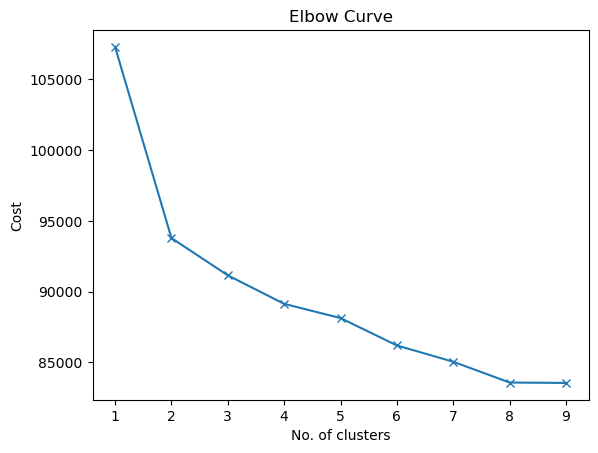

In [27]:
# Elbow curve to find optimal K 
from kmodes.kmodes import KModes
cost = [] 
K = range(1,10) 
for k in list(K): 
    kmode = KModes(n_clusters=k, init = "random", n_init = 5, verbose=1) 
    kmode.fit_predict(data) 
    cost.append(kmode.cost_) 
      
plt.plot(K, cost, 'x-') 
plt.xlabel('No. of clusters') 
plt.ylabel('Cost') 
plt.title('Elbow Curve') 
plt.show()

In [28]:
km_cao = KModes(n_clusters=8, init = "random", n_init = 5, verbose=1)
fitClusters_cao = km_cao.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1350, cost: 85114.0
Run 1, iteration: 2/100, moves: 266, cost: 85114.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1575, cost: 85552.0
Run 2, iteration: 2/100, moves: 345, cost: 85473.0
Run 2, iteration: 3/100, moves: 33, cost: 85470.0
Run 2, iteration: 4/100, moves: 3, cost: 85470.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1700, cost: 86189.0
Run 3, iteration: 2/100, moves: 372, cost: 86091.0
Run 3, iteration: 3/100, moves: 45, cost: 86091.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1668, cost: 85727.0
Run 4, iteration: 2/100, moves: 357, cost: 85683.0
Run 4, iteration: 3/100, moves: 33, cost: 85683.0
Init: initializing centroids
Init: initializing clusters
Starting ite

In [21]:
data_process=pd.read_csv("processed_data.csv")
data_process.head(2)
data_process.shape

(3770, 83)

In [32]:
fitClusters_cao
clusterdf=pd.DataFrame(fitClusters_cao)
clusterdf


,0
0,3
1,2
2,0
3,6
4,7
...,...
3765,5
3766,5
3767,3
3768,3


In [33]:
from kmodes.kmodes import KModes

# Assuming km is your fitted k-modes model
cluster_modes = km_cao.cluster_centroids_
# Assuming df is your DataFrame
cluster_modes_df = pd.DataFrame(cluster_modes, columns=data_process.columns)
for cluster_idx, cluster_mode in enumerate(cluster_modes):
    print(f"Cluster {cluster_idx + 1} - Mode for each feature:")
    for feature_name, mode_category in zip(data_process.columns, cluster_mode):
        print(f"{feature_name}: {mode_category}")
    print("\n")


Cluster 1 - Mode for each feature:
What is your age?: 1.0
How many cups of coffee do you typically drink per day?: 0.0
Where do you typically drink coffee? (At home): 1.0
Where do you typically drink coffee? (At the office): 0.0
Where do you typically drink coffee? (On the go): 0.0
Where do you typically drink coffee? (At a cafe): 0.0
Where do you typically drink coffee? (None of these): 0.0
How do you brew coffee at home? (Pour over): 0.0
How do you brew coffee at home? (French press): 0.0
How do you brew coffee at home? (Espresso): 0.0
How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee)): 0.0
How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso)): 0.0
How do you brew coffee at home? (Instant coffee): 0.0
How do you brew coffee at home? (Bean-to-cup machine): 0.0
How do you brew coffee at home? (Cold brew): 0.0
How do you brew coffee at home? (Coffee extract (e.g. Cometeer)): 0.0
How do you brew coffee at home? (Other): 0.0
On the go, where

In [22]:
X = data_process.drop(columns="Lastly, what was your favorite overall coffee?")
y = data_process["Lastly, what was your favorite overall coffee?"].values

In [23]:
import sklearn
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import chi2
def prepare_inputs(X_train,X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc=oe.transform(X_test)
    return X_train_enc,X_test_enc

def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [24]:
from sklearn.model_selection import train_test_split
X_train_or, X_test, y_train_or, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train_or, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train_or, y_test)



In [25]:
from sklearn.feature_selection import SelectKBest
def select_features(X_train, y_train, X_test, k_value='all'):
    fs = SelectKBest(score_func=chi2, k=k_value)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [26]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc,40)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 24.495499
Feature 1: 11.935019
Feature 2: 1.366083
Feature 3: 5.706244
Feature 4: 4.406435
Feature 5: 10.682563
Feature 6: 1.707880
Feature 7: 42.192176
Feature 8: 11.832801
Feature 9: 8.939784
Feature 10: 36.771822
Feature 11: 35.903970
Feature 12: 17.203210
Feature 13: 20.061275
Feature 14: 6.080288
Feature 15: 5.027144
Feature 16: 5.112697
Feature 17: 0.295691
Feature 18: 0.119710
Feature 19: 0.881657
Feature 20: 1.436606
Feature 21: 0.569384
Feature 22: 1.101836
Feature 23: 22.575269
Feature 24: 63.789493
Feature 25: 67.754320
Feature 26: 39.978093
Feature 27: 19.293760
Feature 28: 10.816142
Feature 29: 20.636756
Feature 30: 39.764267
Feature 31: 22.868535
Feature 32: 38.189932
Feature 33: 36.090993
Feature 34: 30.266528
Feature 35: 43.990808
Feature 36: 44.469432
Feature 37: 55.694718
Feature 38: 0.943193
Feature 39: 3.926969
Feature 40: 5.228888
Feature 41: 5.545024
Feature 42: 5.585672
Feature 43: 6.226877
Feature 44: 4.758887
Feature 45: 4.414911
Feature 46: 23.59590

In [27]:
fs.get_feature_names_out()

array(['x0', 'x1', 'x5', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13',
       'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x46', 'x48', 'x50',
       'x51', 'x53', 'x54', 'x55', 'x56', 'x57', 'x59', 'x60', 'x62',
       'x75', 'x77', 'x80'], dtype=object)

In [41]:
X_test_fs

array([[1., 3., 0., ..., 4., 1., 4.],
       [1., 2., 0., ..., 1., 1., 0.],
       [4., 2., 0., ..., 0., 0., 0.],
       ...,
       [4., 1., 0., ..., 2., 1., 0.],
       [1., 2., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 6., 1., 0.]])

In [42]:

print(X_train_fs.shape)
#print(X_val.shape)
print(X_test_fs.shape)

(3016, 40)
(754, 40)


In [33]:
# Create a random forest classifier for feature importance
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42, n_jobs=6, class_weight='balanced')

clf.fit(X_train_enc,y_train_enc)
y_pred=clf.predict(X_test_enc)
# Evaluate the model with selected features
accuracy_selected = accuracy_score(y_test_enc, y_pred)
print(f"Accuracy with Selected Features: {accuracy_selected:.2f}")

Accuracy with Selected Features: 0.82


In [34]:
feature_importances = pd.DataFrame(clf.feature_importances_, index=X_train_or.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(feature_importances)
feature_importances.to_csv("Feature_importance.csv",index=True)


Feature Importances:
                                                    Importance
Coffee D - Personal Preference                        0.125540
Coffee A - Personal Preference                        0.112486
Coffee C - Personal Preference                        0.100995
Coffee B - Personal Preference                        0.094957
Before today's tasting, which of the following ...    0.026022
...                                                        ...
Where do you typically drink coffee? (None of t...    0.000605
Do you like the taste of coffee?                      0.000000
Do you feel like you’re getting good value for ...    0.000000
Do you feel like you’re getting good value for ...    0.000000
Do you know where your coffee comes from?             0.000000

[82 rows x 1 columns]


In [35]:
feature_importances.head(10)

,Importance
Coffee D - Personal Preference,0.125540
Coffee A - Personal Preference,0.112486
Coffee C - Personal Preference,0.100995
Coffee B - Personal Preference,0.094957
"Before today's tasting, which of the following best described what kind of coffee you like?",0.026022
"Lastly, how would you rate your own coffee expertise?",0.022799
What is your favorite coffee drink?,0.021511
What roast level of coffee do you prefer?,0.020229
What is the most you'd ever be willing to pay for a cup of coffee?,0.018391
Approximately how much have you spent on coffee equipment in the past 5 years?,0.017746


In [36]:
#Select features based on importance threshold
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(clf, threshold=0.005)  # You can adjust the threshold
sfm.fit(X_train_enc, y_train_enc)

# Transform the data to include only selected features
X_train_selected = sfm.transform(X_train_enc)
X_test_selected = sfm.transform(X_test_enc)

In [37]:
X_train_selected.shape

(3016, 42)

In [38]:
# Create a new Random Forest Classifier with the selected features
from sklearn.metrics import accuracy_score
rf_classifier_selected = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data with selected features
rf_classifier_selected.fit(X_train_selected, y_train_enc)

# Make predictions on the test data with selected features
y_pred_selected = rf_classifier_selected.predict(X_test_selected)

# Evaluate the model with selected features
accuracy_selected = accuracy_score(y_test_enc, y_pred_selected)
print(f"Accuracy with Selected Features: {accuracy_selected:.4f}")

Accuracy with Selected Features: 0.8316


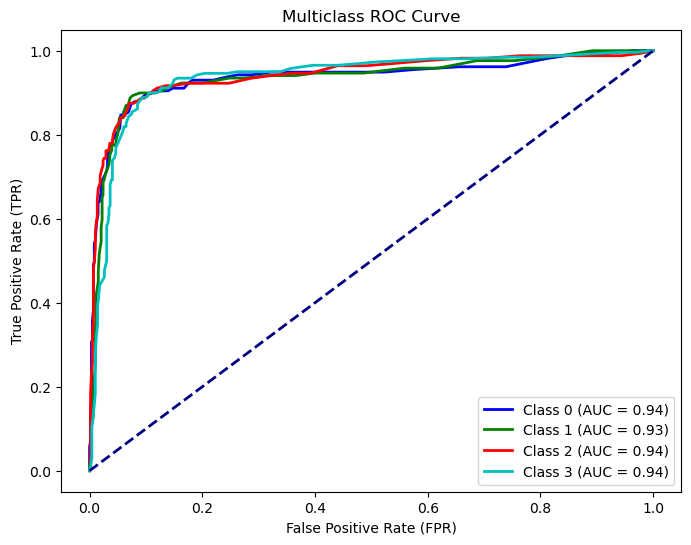

In [46]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming rf_classifier_selected, X_test_selected, and y_test_enc are defined

# Binarize the labels for each class
y_test_bin = label_binarize(y_test_enc, classes=np.unique(y_test_enc))

# Get predicted probabilities for each class
y_prob_selected = rf_classifier_selected.predict_proba(X_test_selected)

# Initialize variables for ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and AUC for each class
for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob_selected[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Adjust the colors if you have more classes
for i in range(y_test_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming X_train_selected and X_test_selected are the feature matrices after feature selection
# Replace this with your actual data

# Create a Multinomial Logistic Regression model
logreg_multinomial = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Fit the model to the training data with selected features
logreg_multinomial.fit(X_train_selected, y_train_enc)

# Make predictions on the test data with selected features
y_pred_multinomial = logreg_multinomial.predict(X_test_selected)

# Evaluate the model with selected features
accuracy_multinomial = accuracy_score(y_test_enc, y_pred_multinomial)
print(f"Accuracy with Multinomial Logistic Regression: {accuracy_multinomial:.4f}")


Accuracy with Multinomial Logistic Regression: 0.8183


In [40]:
logreg_multinomial.coef_

array([[-3.65902717e-02,  3.57716641e-02, -2.33696658e-01,
        -6.15067340e-02, -5.50724955e-02,  6.04091770e-02,
        -8.44235022e-02, -3.50836476e-02,  2.12591767e-01,
        -1.61870853e-01, -1.87617548e-03, -1.73072502e-03,
         3.97815095e-02, -3.57807208e-03, -1.40650490e-02,
         2.50081135e-02, -1.95748849e-02, -1.72288048e-02,
         4.71605637e-03,  1.54969910e+00,  6.17080579e-02,
         4.18854382e-04, -4.34676576e-01,  2.17773653e-02,
        -2.24449661e-03, -4.16890783e-01,  1.13400215e-02,
        -5.95553391e-02, -5.98643915e-01,  4.71216805e-02,
        -3.73173436e-02, -1.24368754e-01, -2.51086458e-03,
        -5.24732613e-02, -1.58070920e-03, -8.24172922e-03,
         2.25300187e-02, -1.08444203e-02, -1.08658173e-02,
        -4.73376715e-02,  1.62800871e-02,  3.35729501e-02],
       [-6.60669196e-03, -5.48651484e-02,  1.52615397e-01,
         6.92741634e-02, -3.59633059e-02,  1.53155298e-01,
        -2.26529087e-01, -2.22691653e-02,  2.34599917e-

In [42]:
logreg_multinomial.intercept_

array([-0.16714962,  0.12126125, -0.64612361,  0.69201197])

In [44]:
logreg_multinomial.score

<bound method ClassifierMixin.score of LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)>

In [88]:
import matplotlib.pyplot as plt 
%matplotlib inline 
from kmodes.kmodes import KModes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 81421.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 81421.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 81421.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 81421.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 81421.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 45, cost: 70550.0
Run 1, iteration: 2/100, moves: 2, cost: 70550.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1248, cost: 70549.0
Run 2, iteration: 2/10

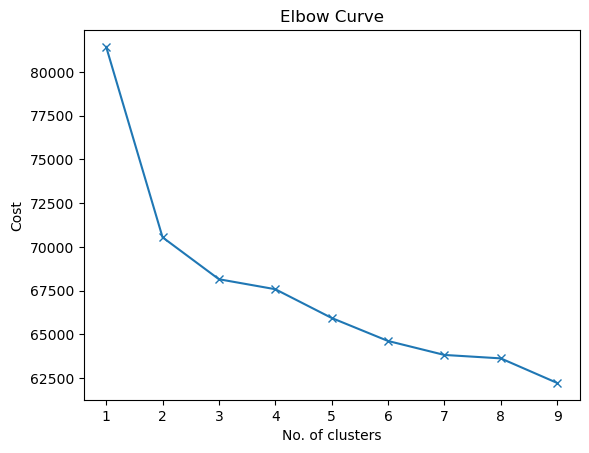

In [118]:
# Elbow curve to find optimal K 
cost = [] 
K = range(1,10) 
for k in list(K): 
    kmode = KModes(n_clusters=k, init = "random", n_init = 5, verbose=1) 
    kmode.fit_predict(X_train_enc) 
    cost.append(kmode.cost_) 
      
plt.plot(K, cost, 'x-') 
plt.xlabel('No. of clusters') 
plt.ylabel('Cost') 
plt.title('Elbow Curve') 
plt.show()

In [90]:

km_cao = KModes(n_clusters=4, init = "random", n_init = 5, verbose=1)
fitClusters_cao = km_cao.fit_predict(X_train)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 898, cost: 35287.0
Run 1, iteration: 2/100, moves: 39, cost: 35264.0
Run 1, iteration: 3/100, moves: 7, cost: 35264.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 693, cost: 35055.0
Run 2, iteration: 2/100, moves: 135, cost: 35055.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 470, cost: 34735.0
Run 3, iteration: 2/100, moves: 112, cost: 34735.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1372, cost: 34776.0
Run 4, iteration: 2/100, moves: 313, cost: 34679.0
Run 4, iteration: 3/100, moves: 296, cost: 34323.0
Run 4, iteration: 4/100, moves: 168, cost: 34323.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 404, cost

In [ ]:
km.predict(X)

In [96]:
# Selecting the categorical and the binary variables
data_selected=data.drop(columns="Lastly, what was your favorite overall coffee?")